In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

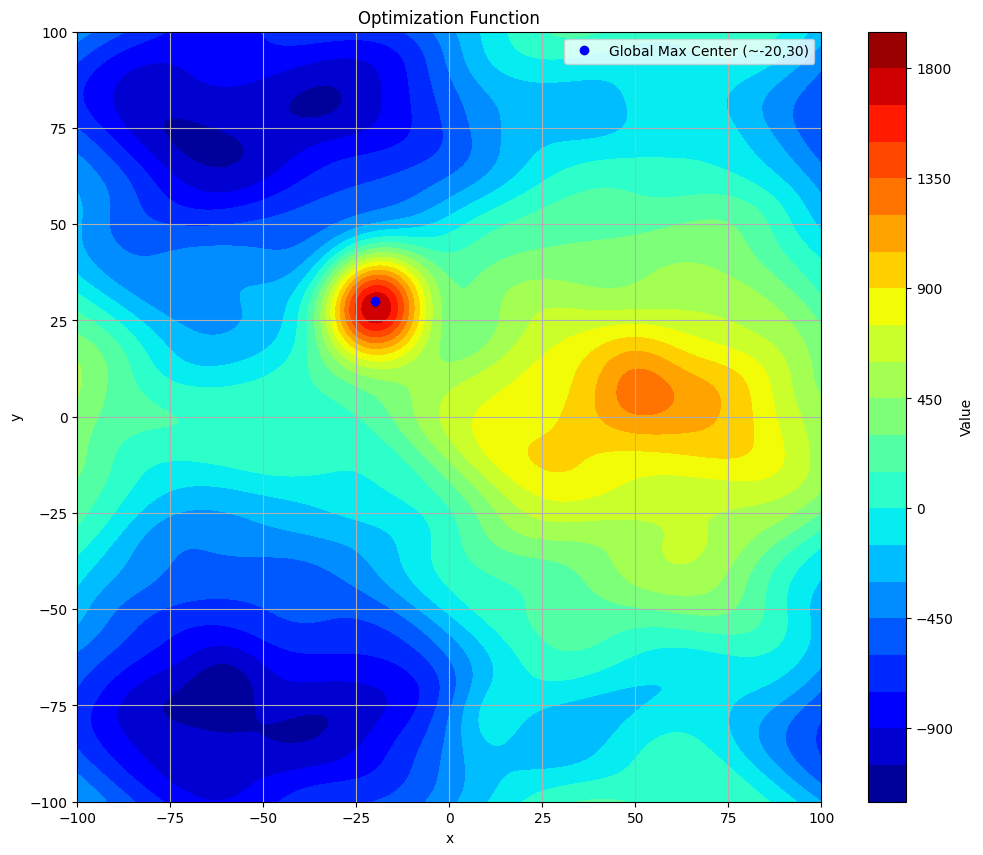

In [2]:
def f(x, y):
    base = 500 * (np.sin(0.03*x) + np.cos(0.04*y))
    dist_global = np.sqrt((x+20)**2 + (y-30)**2)
    global_max = 2000 * np.where(dist_global < 1.5, 1, np.exp(-dist_global**2/200))  
    local_max1 = 300 * np.exp(-((x-50)**2 + (y-10)**2)/150)
    local_min1 = -200 * np.exp(-((x+60)**2 + (y+70)**2)/100)
    local_max2 = 250 * np.exp(-((x-10)**2 + (y+80)**2)/120)
    noise = 80 * (np.sin(0.1*x + np.cos(0.15*y)) + np.cos(0.12*y + np.sin(0.08*x)))
    boundary = -0.003 * (x**2 + y**2)
    
    return base + global_max + local_max1 + local_min1 + local_max2 + noise + boundary

x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

plt.figure(figsize=(12, 10))
contourf = plt.contourf(X, Y, Z, levels=20, cmap='jet')
plt.colorbar(contourf, label='Value')
plt.title('Optimization Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.plot(-20, 30, 'bo', label='Global Max Center (~-20,30)')
plt.legend()

plt.show()

In [ ]:
def GWO(nw, dim, iter):
    wolves_path = []  
    a = 2  
    xMin, xMax = -100, 100
    yMin, yMax = -100, 100
    
    wolves = np.random.normal(xMin, xMax, (nw, dim))
    
    fitness = -f(wolves[:, 0], wolves[:, 1])
    sorted_idx = np.argsort(fitness)
    
    X_alpha, X_beta, X_delta = wolves[sorted_idx[:3]]  

    for t in range(iter):
        a = 2 - t * (2 / iter) 
        
        for i in range(nw):
            A1, A2, A3 = 2 * a * np.random.rand(dim) - a, 2 * a * np.random.rand(dim) - a, 2 * a * np.random.rand(dim) - a
            C1, C2, C3 = 2 * np.random.rand(dim), 2 * np.random.rand(dim), 2 * np.random.rand(dim)

            D_alpha = np.abs(C1 * X_alpha - wolves[i])
            D_beta = np.abs(C2 * X_beta - wolves[i])
            D_delta = np.abs(C3 * X_delta - wolves[i])

            X1 = X_alpha - A1 * D_alpha
            X2 = X_beta - A2 * D_beta
            X3 = X_delta - A3 * D_delta

            wolves[i] = (X1 + X2 + X3) / 3
            
            wolves[i] = np.clip(wolves[i], [xMin, yMin], [xMax, yMax])
    
        wolves_path.append(np.copy(wolves))

        fitness = -f(wolves[:, 0], wolves[:, 1])
        sorted_idx = np.argsort(fitness)
        X_alpha, X_beta, X_delta = wolves[sorted_idx[:3]]  
    
    return X_alpha, f(X_alpha[0], X_alpha[1]), wolves_path


In [ ]:


def create_gif(wolves_path, filename="wolves_movement.gif"):
    frames = []
    x = np.linspace(-100, 100, 200)
    y = np.linspace(-100, 100, 200)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)  

    for i, wolves in enumerate(wolves_path):
        fig, ax = plt.subplots(figsize=(10, 8))
        contourf = ax.contourf(X, Y, Z, levels=20, cmap='jet')
        ax.scatter(wolves[:, 0], wolves[:, 1], color='white', edgecolors='black', label='Wolves')
        ax.scatter(-20, 30, c='blue', label='Global Max (~-20,30)', marker='o')
        ax.set_title(f'Grey Wolf Optimizer - Iteration {i+1}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()
        ax.grid(True)
        plt.colorbar(contourf, ax=ax, label='Value')
        plt.tight_layout()

        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(Image.fromarray(img))

        if i != len(wolves_path) - 1:
            plt.close(fig) 

    if frames:
        frames[0].save(filename, save_all=True, append_images=frames[1:], duration=100, loop=0)


create_gif(wolves_path, "wolves_movement.gif")


In [ ]:
num_wolves = 100
num_iter = 500
best_solution, best_fitness, wolves_path = GWO(num_wolves, 2, num_iter)

print(f"Best Solution: {best_solution}, Fitness: {best_fitness}")
create_gif(wolves_path, "wolves_movement.gif")
